# Attention is all you need - Part 1

In [12]:
import os
import torch
import torch.nn.functional as F

In [2]:
# n-gram
# read data
words = open('./data/names.txt', 'r').read().splitlines()

In [9]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [10]:
len(words)

32033

In [11]:
min([len(w) for w in words])

2

In [12]:
max([len(w) for w in words])

15

In [24]:
# bigram
b_key_frequency = {}
for word in words:
    # add <S> and <E> to the word
    word = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(word, word[1:]):
        bigram = (ch1, ch2)
        b_key_frequency[bigram] = b_key_frequency.get(bigram, 0) + 1

In [25]:
# sort by frequency reversely
b_key_frequency = sorted(b_key_frequency.items(), key=lambda x: x[1], reverse=True)
b_key_frequency[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [27]:
import torch

In [28]:
# first tensor
t = torch.zeros((3, 5), dtype=torch.int32)
t

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [6]:
# create charater to index mapping
chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [34]:
# creat index to charater mapping
char_to_idx = {ch: i for i, ch in enumerate(chars)}
char_to_idx['<S>'] = len(char_to_idx)
char_to_idx['<E>'] = len(char_to_idx) 

In [35]:
char_to_idx

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [37]:
N_gram_matrix = torch.zeros((len(char_to_idx), len(char_to_idx)), dtype=torch.int32)
for word in words:
    word = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(word, word[1:]):
        id_row = char_to_idx[ch1]
        id_col = char_to_idx[ch2]
        N_gram_matrix[id_row, id_col] += 1

In [50]:
N_gram_matrix[2, 2].item()

42

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# create dict called idx to char
idx_to_char = {i: ch for ch, i in char_to_idx.items()}
idx_to_char

NameError: name 'char_to_idx' is not defined

In [56]:
# matplotlib retina display
%config InlineBackend.figure_format = 'retina'

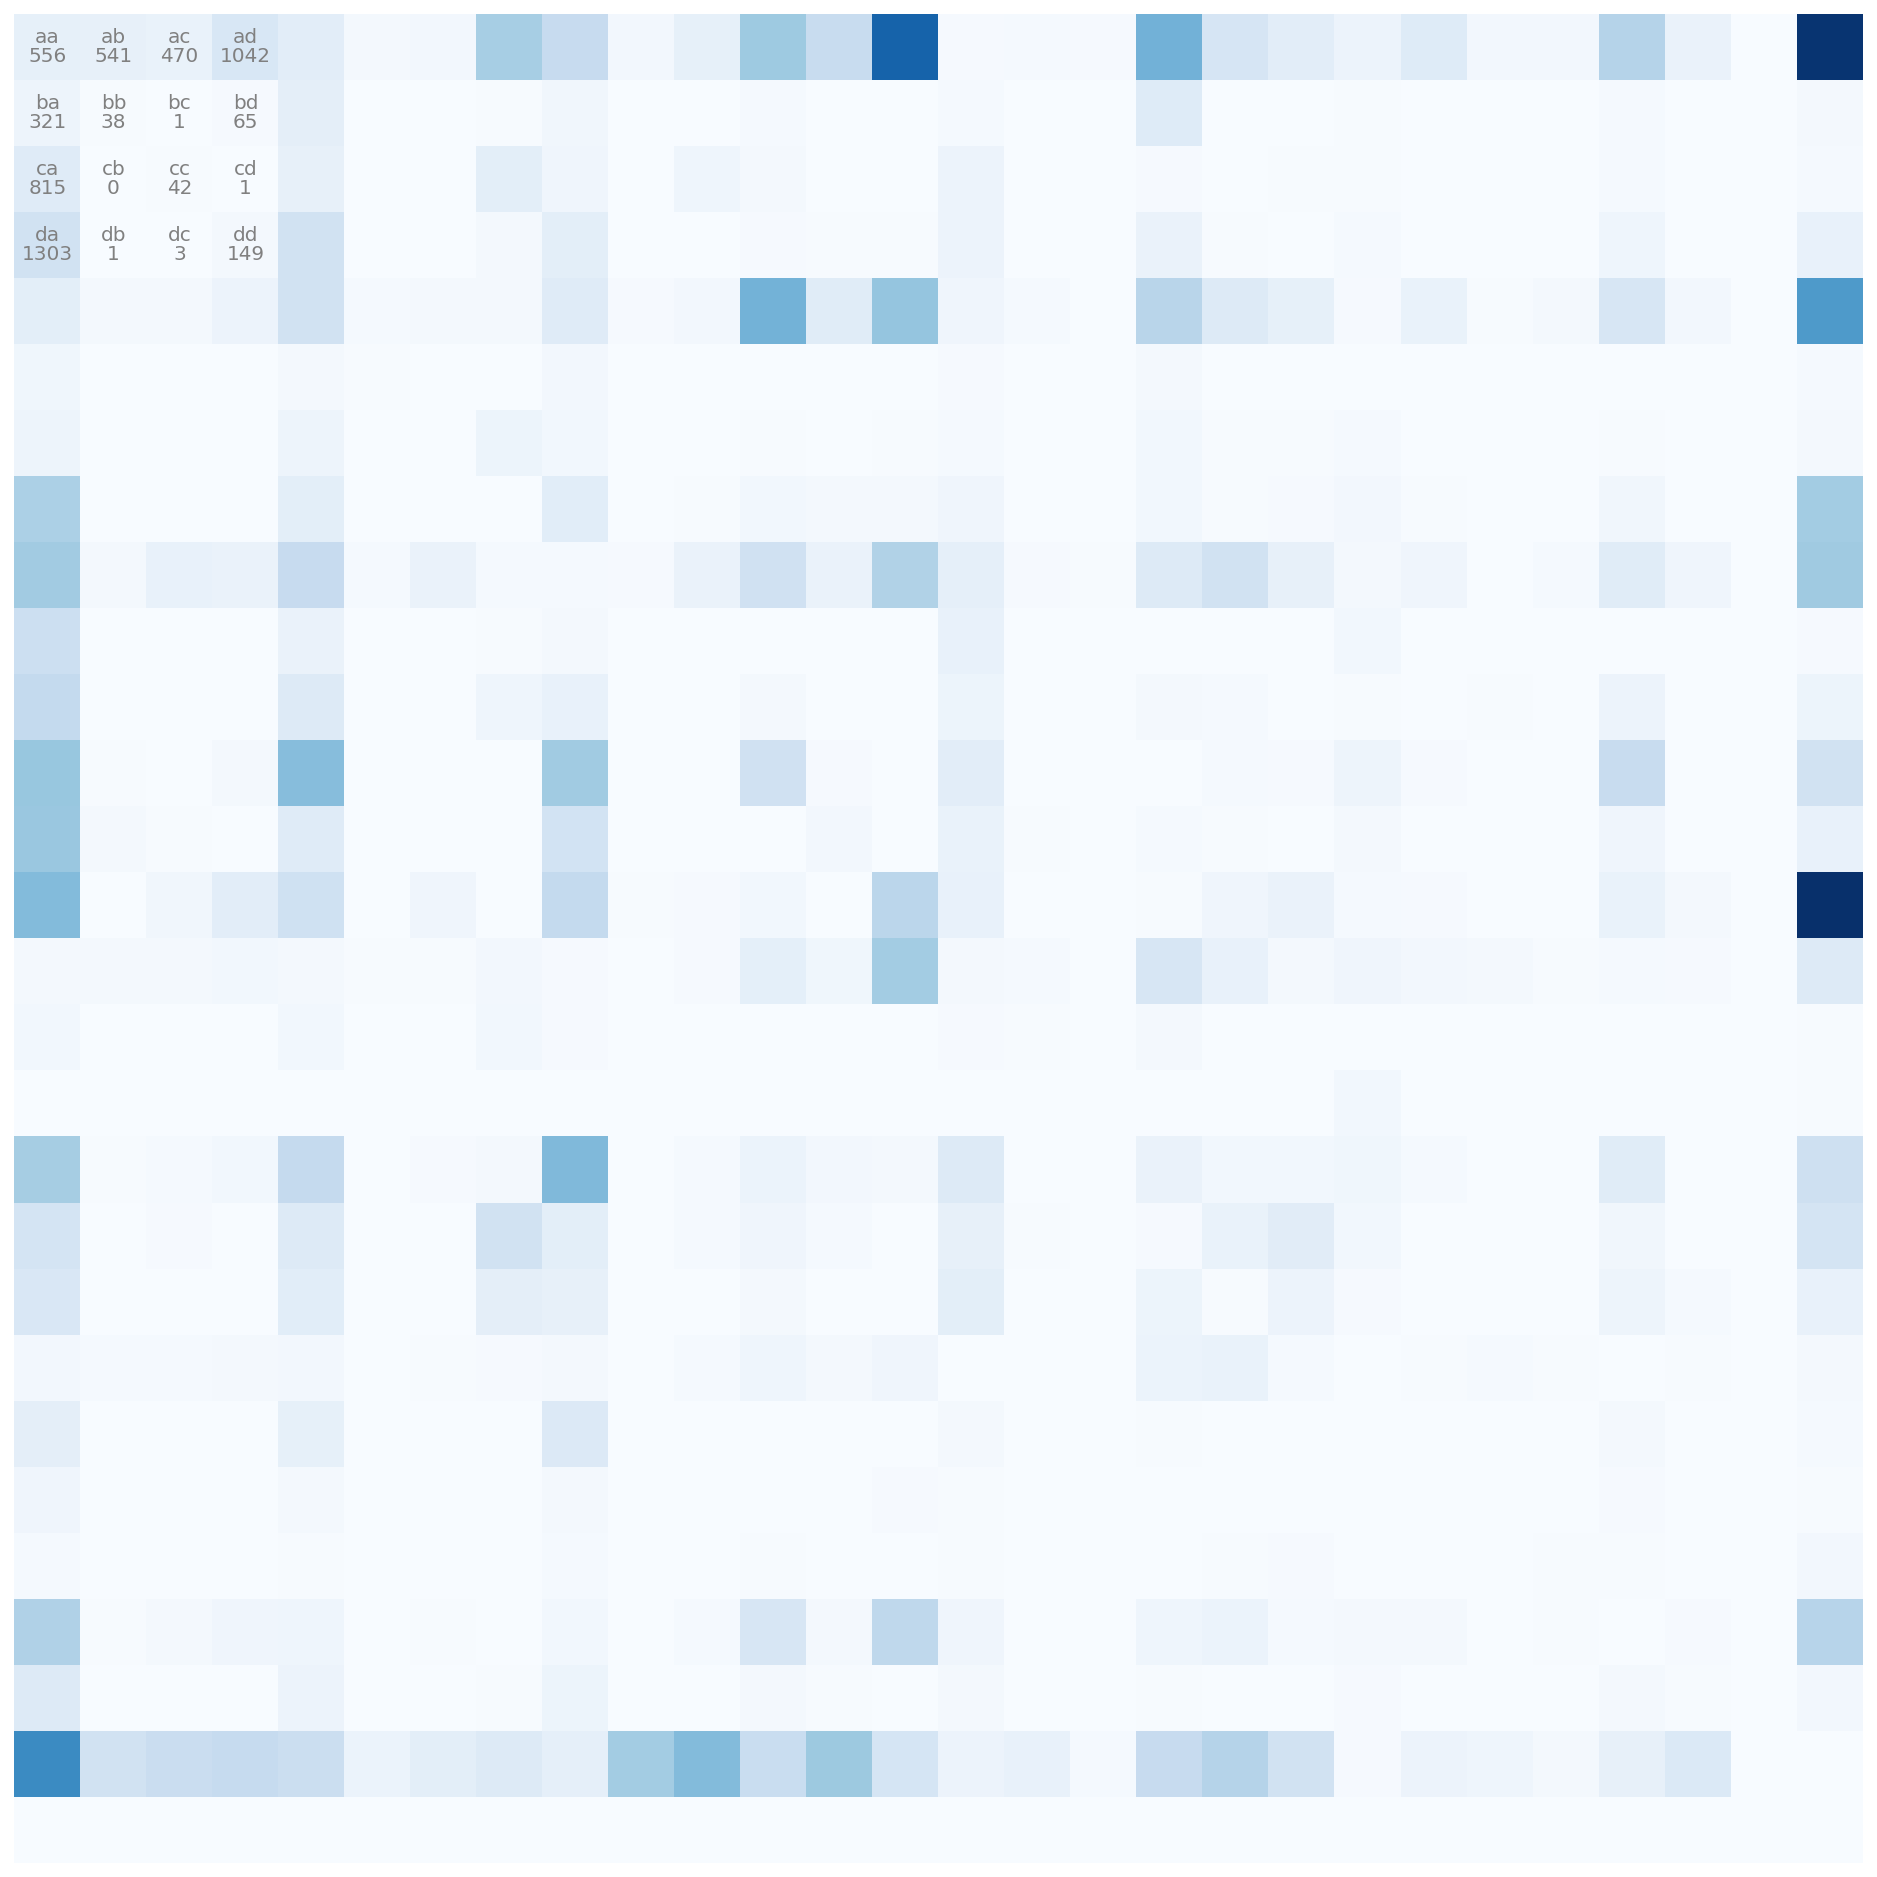

In [62]:
# plot the matrix
plt.figure(figsize=(17, 17))
plt.imshow(N_gram_matrix, cmap='Blues')
# add charater labels
for i in range(len(char_to_idx)):
    for j in range(len(char_to_idx)):
        # get charater
        temp_char = idx_to_char[i] + idx_to_char[j]
        plt.text(j, i, temp_char, ha='center', va='bottom', color='gray')
        # add number
        plt.text(j, i, N_gram_matrix[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off');

In [8]:
# use . to replace <S> and <E>
char_to_idx = {ch: i+1 for i, ch in enumerate(chars)}
char_to_idx['.'] = 0
char_to_idx
idx_to_char = {i: ch for ch, i in char_to_idx.items()}

In [64]:
# construct the matrix
N_gram_matrix = torch.zeros((len(char_to_idx), len(char_to_idx)), dtype=torch.int32)
for word in words:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word, word[1:]):
        id_row = char_to_idx[ch1]
        id_col = char_to_idx[ch2]
        N_gram_matrix[id_row, id_col] += 1

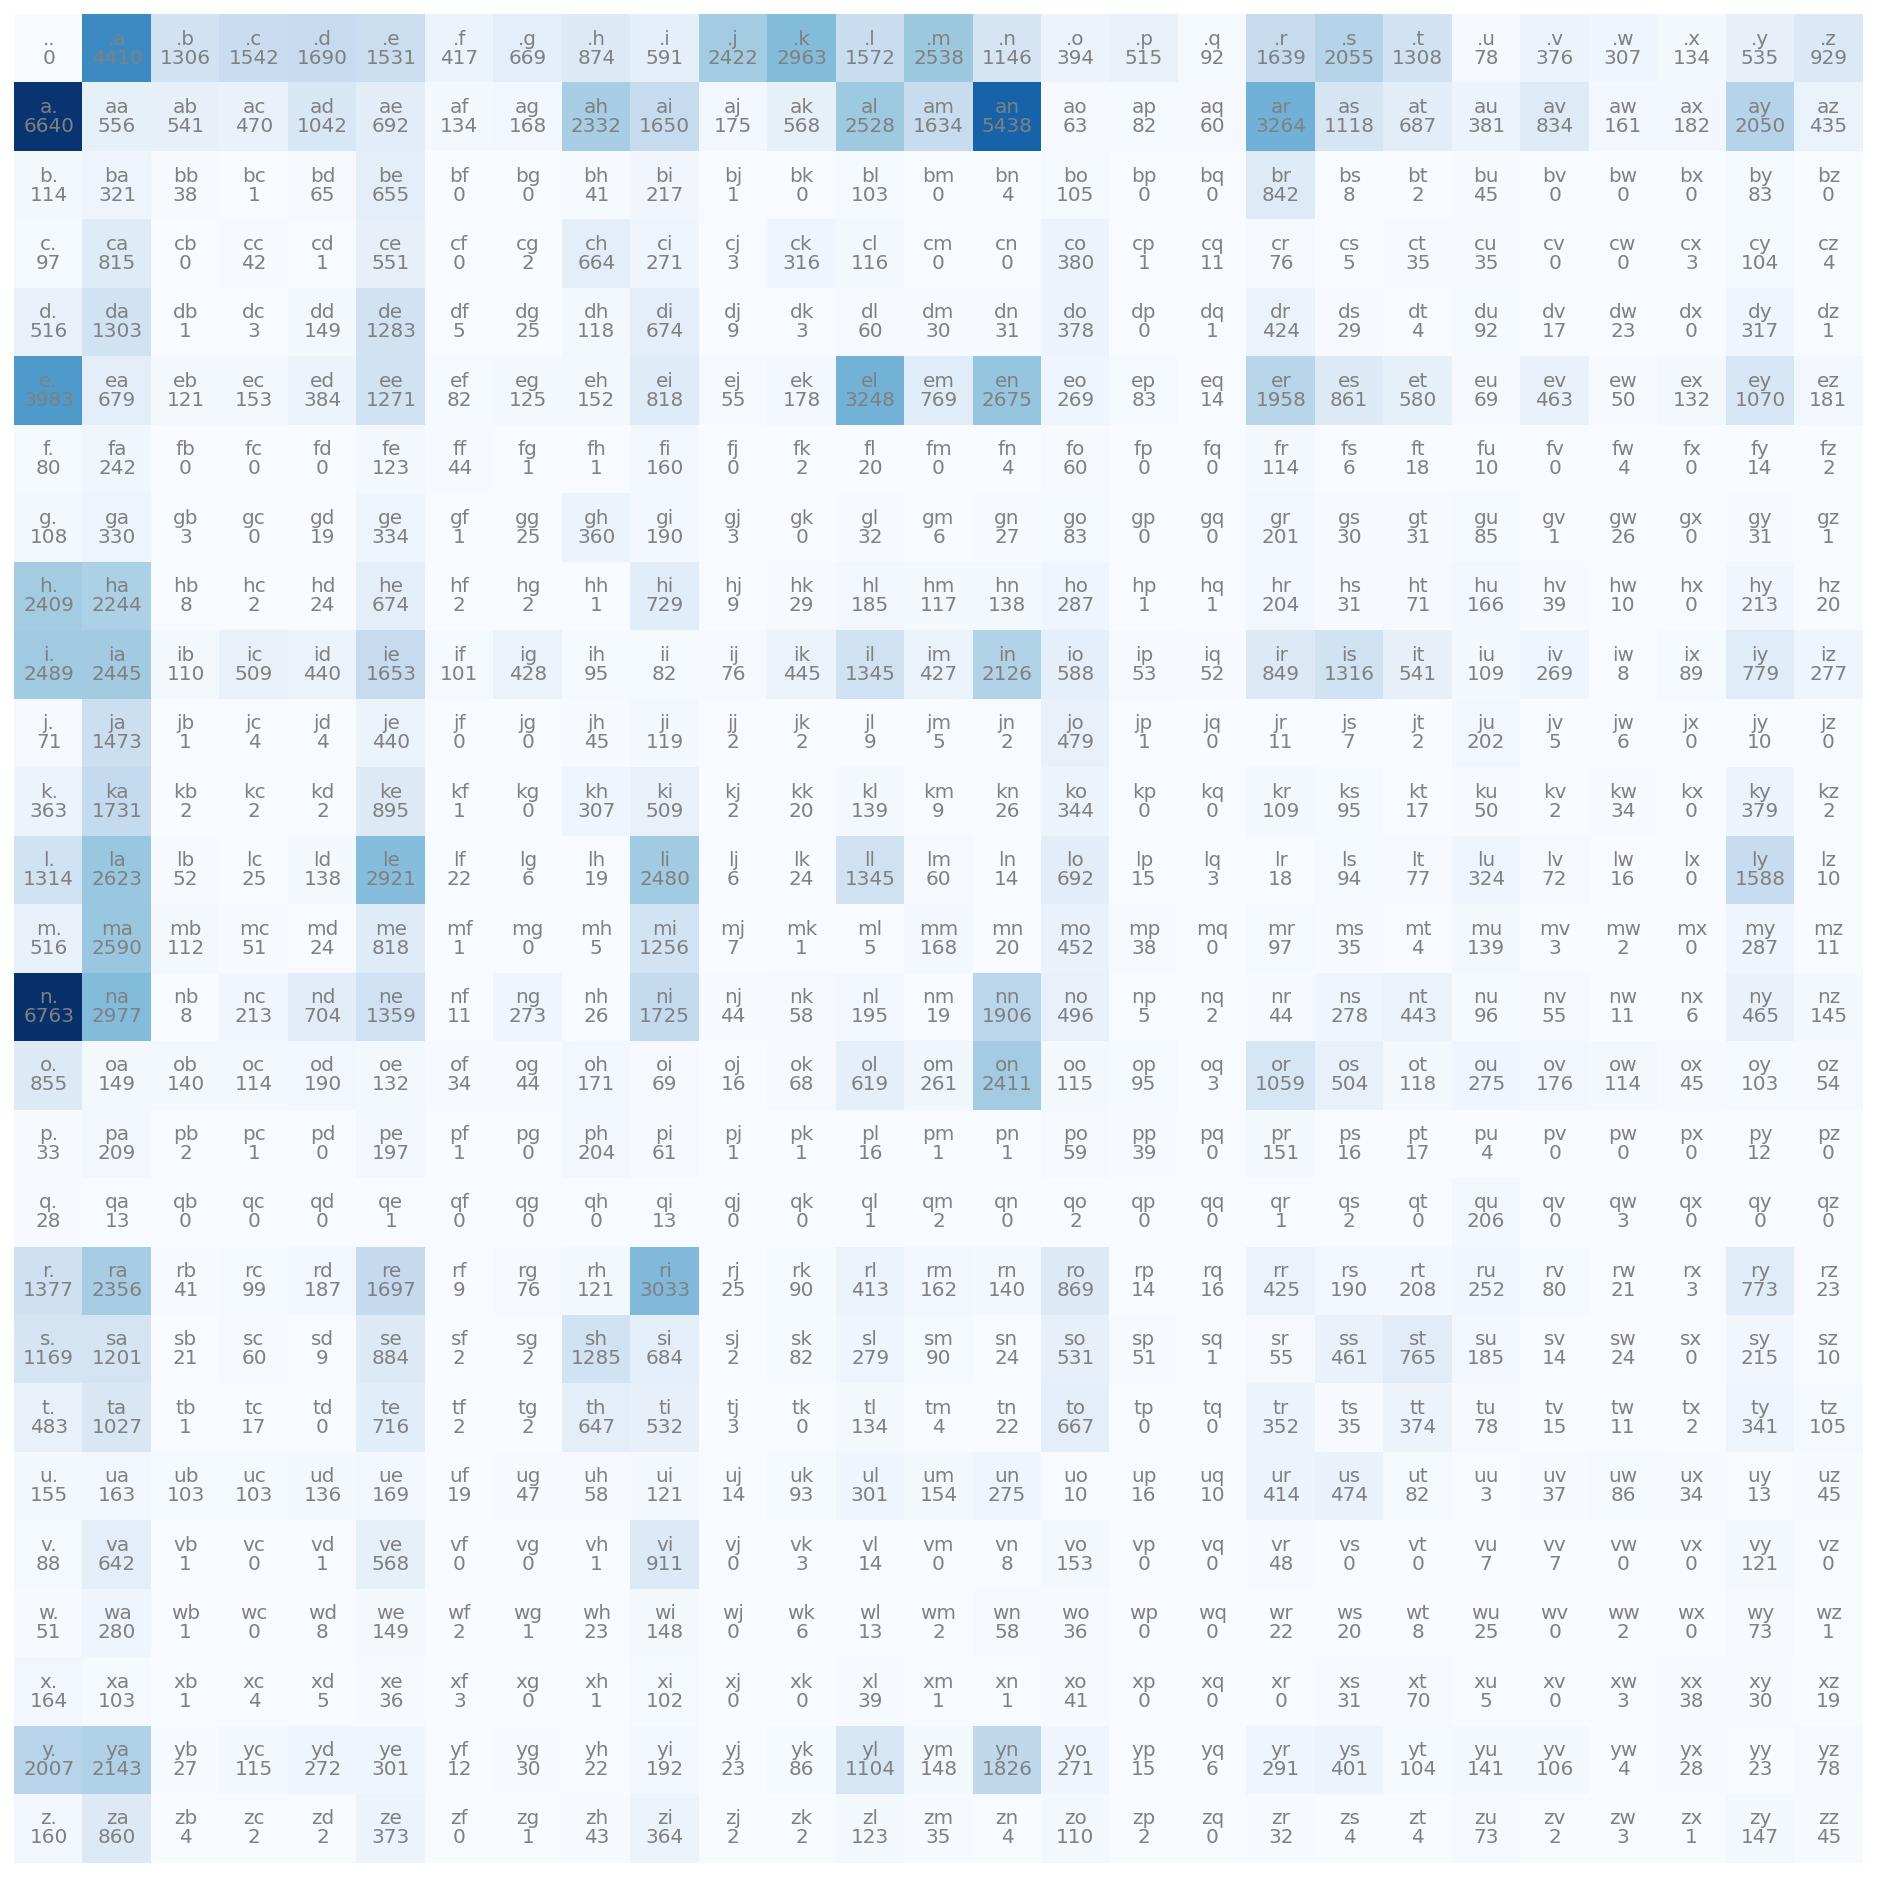

In [67]:
# plot the matrix
plt.figure(figsize=(17, 17))
plt.imshow(N_gram_matrix, cmap='Blues')
# add charater labels
for i in range(len(char_to_idx)):
    for j in range(len(char_to_idx)):
        # get charater
        temp_char = idx_to_char[i] + idx_to_char[j]
        plt.text(j, i, temp_char, ha='center', va='bottom', color='gray')
        # add number
        plt.text(j, i, N_gram_matrix[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off');

In [68]:
# construct the probability for the first charater
a_prob = N_gram_matrix[0].float() / N_gram_matrix[0].sum()
a_prob

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [88]:
# set the seed by using torch.manual_seed
torch.manual_seed(1234)
sample_idx = torch.multinomial(a_prob, num_samples=1, replacement=True).item()
print(sample_idx)
idx_to_char[sample_idx]

11


'k'

In [92]:
# now let's generate a name
# set the seed by using torch.manual_seed
torch.manual_seed(769)
# set idx to be the first charater
idx = 0
while True:
    # get the probability
    a_prob = N_gram_matrix[idx].float() / N_gram_matrix[idx].sum()
    # sample a charater
    idx = torch.multinomial(a_prob, num_samples=1, replacement=True).item()
    print(idx_to_char[idx], end='')
    if idx == 0:
        break

katay.

In [96]:
# now sample 10 names
torch.manual_seed(666)
for _ in range(10):
    idx = 0
    gen_names = []
    while True:
        # get the probability
        a_prob = N_gram_matrix[idx].float() / N_gram_matrix[idx].sum()
        # sample a charater
        idx = torch.multinomial(a_prob, num_samples=1, replacement=True).item()
        gen_names.append(idx_to_char[idx])
        if idx == 0:
            break
    print(''.join(gen_names))

ka.
ahute.
gethairierinibn.
ryan.
kymaninlerulis.
len.
h.
kee.
kisovelil.
salirq.


In [99]:
# construct the probability matrix
P_matrix = N_gram_matrix.float() / N_gram_matrix.sum(dim=1, keepdim=True)
P_matrix.shape

torch.Size([27, 27])

In [102]:
P_matrix[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [103]:
# now sample 10 names
torch.manual_seed(666)
for _ in range(10):
    idx = 0
    gen_names = []
    while True:
        # get the probability
        a_prob = P_matrix[idx]
        # sample a charater
        idx = torch.multinomial(a_prob, num_samples=1, replacement=True).item()
        gen_names.append(idx_to_char[idx])
        if idx == 0:
            break
    print(''.join(gen_names))

ka.
ahute.
gethairierinibn.
ryan.
kymaninlerulis.
len.
h.
kee.
kisovelil.
salirq.


In [104]:
# the probability of generating a name randomly
1/len(char_to_idx)

0.037037037037037035

In [107]:
# print out some probability
for word in words[:3]:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word, word[1:]):
        id_row = char_to_idx[ch1]
        id_col = char_to_idx[ch2]
        print(f'P({ch2}|{ch1}) = {P_matrix[id_row, id_col]:.4f}')

P(e|.) = 0.0478
P(m|e) = 0.0377
P(m|m) = 0.0253
P(a|m) = 0.3899
P(.|a) = 0.1960
P(o|.) = 0.0123
P(l|o) = 0.0780
P(i|l) = 0.1777
P(v|i) = 0.0152
P(i|v) = 0.3541
P(a|i) = 0.1381
P(.|a) = 0.1960
P(a|.) = 0.1377
P(v|a) = 0.0246
P(a|v) = 0.2495
P(.|a) = 0.1960


In [112]:
# print out some probability with log
log_likelihood = 0
sample_size = 0
for word in words[:3]:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word, word[1:]):
        sample_size += 1
        id_row = char_to_idx[ch1]
        id_col = char_to_idx[ch2]
        prob = P_matrix[id_row, id_col]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        print(f'P({ch2}|{ch1}) = {prob:.4f}; {log_prob:.4f}')
print(f'log likelihood = {log_likelihood:.4f}')
# negative log likelihood
print(f'negative log likelihood = {-log_likelihood:.4f}')
# average negative log likelihood
print(f'average negative log likelihood = {-log_likelihood/sample_size:.4f}')

P(e|.) = 0.0478; -3.0408
P(m|e) = 0.0377; -3.2793
P(m|m) = 0.0253; -3.6772
P(a|m) = 0.3899; -0.9418
P(.|a) = 0.1960; -1.6299
P(o|.) = 0.0123; -4.3982
P(l|o) = 0.0780; -2.5508
P(i|l) = 0.1777; -1.7278
P(v|i) = 0.0152; -4.1867
P(i|v) = 0.3541; -1.0383
P(a|i) = 0.1381; -1.9796
P(.|a) = 0.1960; -1.6299
P(a|.) = 0.1377; -1.9829
P(v|a) = 0.0246; -3.7045
P(a|v) = 0.2495; -1.3882
P(.|a) = 0.1960; -1.6299
log likelihood = -38.7856
negative log likelihood = 38.7856
average negative log likelihood = 2.4241


In [117]:
# smooth the probability
P_matrix = (N_gram_matrix+1).float() / N_gram_matrix.sum(dim=1, keepdim=True)
P_matrix.shape

torch.Size([27, 27])

In [118]:
# print out some probability with log
log_likelihood = 0
sample_size = 0
for word in words[:3]:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word, word[1:]):
        sample_size += 1
        id_row = char_to_idx[ch1]
        id_col = char_to_idx[ch2]
        prob = P_matrix[id_row, id_col]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        print(f'P({ch2}|{ch1}) = {prob:.4f}; {log_prob:.4f}')
print(f'log likelihood = {log_likelihood:.4f}')
# negative log likelihood
print(f'negative log likelihood = {-log_likelihood:.4f}')
# average negative log likelihood
print(f'average negative log likelihood = {-log_likelihood/sample_size:.4f}')

P(e|.) = 0.0478; -3.0402
P(m|e) = 0.0377; -3.2780
P(m|m) = 0.0254; -3.6713
P(a|m) = 0.3901; -0.9414
P(.|a) = 0.1960; -1.6297
P(o|.) = 0.0123; -4.3956
P(l|o) = 0.0781; -2.5492
P(i|l) = 0.1777; -1.7274
P(v|i) = 0.0153; -4.1830
P(i|v) = 0.3545; -1.0372
P(a|i) = 0.1382; -1.9792
P(.|a) = 0.1960; -1.6297
P(a|.) = 0.1377; -1.9827
P(v|a) = 0.0246; -3.7033
P(a|v) = 0.2499; -1.3867
P(.|a) = 0.1960; -1.6297
log likelihood = -38.7642
negative log likelihood = 38.7642
average negative log likelihood = 2.4228


## Neural Network Approach

In [128]:
# create a training set
xs, ys = [], []
for word in words[:1]:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word, word[1:]):
        xs.append(char_to_idx[ch1])
        ys.append(char_to_idx[ch2])

# convert to tensor
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [129]:
xs

tensor([ 0,  5, 13, 13,  1])

In [130]:
xs.shape

torch.Size([5])

In [131]:
ys

tensor([ 5, 13, 13,  1,  0])

In [132]:
# encode the data
import torch.nn.functional as F
xs_onehot = F.one_hot(xs, num_classes=len(char_to_idx)).float()

In [142]:
xs_onehot

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

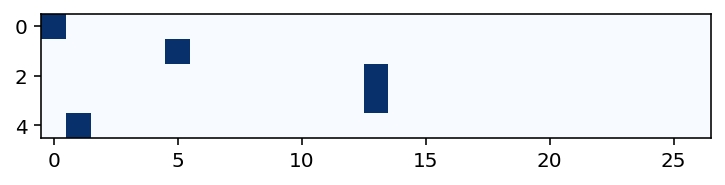

In [133]:
plt.imshow(xs_onehot, cmap='Blues')

In [125]:
xs_onehot.shape

torch.Size([16, 27])

In [140]:
# create weights
W = torch.randn(len(char_to_idx), len(char_to_idx), requires_grad=True)
W.shape

torch.Size([27, 27])

In [141]:
(xs_onehot @ W).shape

torch.Size([5, 27])

In [143]:
(xs_onehot @ W)

tensor([[ 0.4999,  0.8276,  0.4457, -1.2227, -0.6933,  0.0912,  0.4507, -1.6542,
          0.2809, -1.2594, -1.6911,  1.3546, -0.0902,  1.1974, -1.7343,  0.1697,
         -0.1348, -1.4174, -0.8189, -1.4812,  0.5710,  0.3748, -0.4240,  0.1381,
         -1.4667,  0.0048, -0.7243],
        [-0.5064, -0.4781, -0.7556,  0.9816,  0.7424,  0.8737, -1.1226,  1.3574,
          0.7111,  0.3105, -0.1344,  0.2166, -0.3080,  2.2568, -0.5646, -1.3268,
          0.6638, -0.3638, -0.2376,  0.2824, -2.3882, -0.3915, -0.8194, -0.6328,
          0.4260,  0.5812,  0.0199],
        [-0.5213, -0.4860, -0.7427,  0.1491, -0.4514, -1.6135, -0.7081,  1.2081,
          1.1985, -0.5396,  0.3729,  1.2379,  0.2059,  1.4451,  0.4373,  0.1288,
          0.2498,  0.0059,  0.6775, -0.3178, -1.1198, -1.0947, -0.3903,  0.3611,
          0.1143, -1.3619,  1.4840],
        [-0.5213, -0.4860, -0.7427,  0.1491, -0.4514, -1.6135, -0.7081,  1.2081,
          1.1985, -0.5396,  0.3729,  1.2379,  0.2059,  1.4451,  0.4373,  0.1288

In [144]:
(xs_onehot @ W).exp()

tensor([[ 1.6485,  2.2878,  1.5616,  0.2944,  0.4999,  1.0955,  1.5694,  0.1912,
          1.3243,  0.2838,  0.1843,  3.8754,  0.9137,  3.3116,  0.1765,  1.1850,
          0.8739,  0.2424,  0.4409,  0.2274,  1.7700,  1.4546,  0.6544,  1.1480,
          0.2307,  1.0048,  0.4847],
        [ 0.6026,  0.6200,  0.4697,  2.6687,  2.1010,  2.3958,  0.3254,  3.8862,
          2.0363,  1.3642,  0.8742,  1.2418,  0.7349,  9.5526,  0.5686,  0.2653,
          1.9422,  0.6951,  0.7885,  1.3264,  0.0918,  0.6760,  0.4407,  0.5311,
          1.5311,  1.7881,  1.0201],
        [ 0.5937,  0.6151,  0.4758,  1.1608,  0.6367,  0.1992,  0.4926,  3.3471,
          3.3153,  0.5830,  1.4519,  3.4482,  1.2286,  4.2423,  1.5485,  1.1374,
          1.2838,  1.0059,  1.9689,  0.7277,  0.3264,  0.3346,  0.6768,  1.4349,
          1.1210,  0.2562,  4.4108],
        [ 0.5937,  0.6151,  0.4758,  1.1608,  0.6367,  0.1992,  0.4926,  3.3471,
          3.3153,  0.5830,  1.4519,  3.4482,  1.2286,  4.2423,  1.5485,  1.1374

In [145]:
# mimic the softmax function
log_out = xs_onehot @ W
log_counts = log_out.exp()
prob = log_counts / log_counts.sum(dim=1, keepdim=True)
prob

tensor([[0.0570, 0.0791, 0.0540, 0.0102, 0.0173, 0.0379, 0.0542, 0.0066, 0.0458,
         0.0098, 0.0064, 0.1339, 0.0316, 0.1144, 0.0061, 0.0410, 0.0302, 0.0084,
         0.0152, 0.0079, 0.0612, 0.0503, 0.0226, 0.0397, 0.0080, 0.0347, 0.0168],
        [0.0149, 0.0153, 0.0116, 0.0658, 0.0518, 0.0591, 0.0080, 0.0959, 0.0502,
         0.0337, 0.0216, 0.0306, 0.0181, 0.2356, 0.0140, 0.0065, 0.0479, 0.0171,
         0.0195, 0.0327, 0.0023, 0.0167, 0.0109, 0.0131, 0.0378, 0.0441, 0.0252],
        [0.0156, 0.0162, 0.0125, 0.0305, 0.0167, 0.0052, 0.0130, 0.0880, 0.0872,
         0.0153, 0.0382, 0.0907, 0.0323, 0.1116, 0.0407, 0.0299, 0.0338, 0.0265,
         0.0518, 0.0191, 0.0086, 0.0088, 0.0178, 0.0377, 0.0295, 0.0067, 0.1160],
        [0.0156, 0.0162, 0.0125, 0.0305, 0.0167, 0.0052, 0.0130, 0.0880, 0.0872,
         0.0153, 0.0382, 0.0907, 0.0323, 0.1116, 0.0407, 0.0299, 0.0338, 0.0265,
         0.0518, 0.0191, 0.0086, 0.0088, 0.0178, 0.0377, 0.0295, 0.0067, 0.1160],
        [0.0072, 0.0150,

In [146]:
prob[0].sum()

tensor(1., grad_fn=<SumBackward0>)

In [148]:
print(xs, ys)

tensor([ 0,  5, 13, 13,  1]) tensor([ 5, 13, 13,  1,  0])


In [156]:
# print out the forward pass
neg_log_likelihood = 0
for i in range(5):
    x = xs[i].item() # input char index
    y = ys[i].item() # output char index
    print("-"*10)
    print(f"bigram example: {idx_to_char[x]}{idx_to_char[y]}, index = ({x},{y})")
    # input one-hot vector
    print("input one-hot vector", xs_onehot[i])
    # output probability
    print("output probability", prob[i])
    # output probability of predicting the correct char
    print("output probability assigned ", prob[i,y])
    # log likelihood
    print("log likelihood", torch.log(prob[i,y]))
    # negative log likelihood
    neg_log_likelihood += -torch.log(prob[i,y])
    print("negative log likelihood", neg_log_likelihood)

# average negative log likelihood
print(f'average negative log likelihood = {neg_log_likelihood/len(xs):.4f}')


----------
bigram example: .e, index = (0,5)
input one-hot vector tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
output probability tensor([0.0570, 0.0791, 0.0540, 0.0102, 0.0173, 0.0379, 0.0542, 0.0066, 0.0458,
        0.0098, 0.0064, 0.1339, 0.0316, 0.1144, 0.0061, 0.0410, 0.0302, 0.0084,
        0.0152, 0.0079, 0.0612, 0.0503, 0.0226, 0.0397, 0.0080, 0.0347, 0.0168],
       grad_fn=<SelectBackward0>)
output probability assigned  tensor(0.0379, grad_fn=<SelectBackward0>)
log likelihood tensor(-3.2738, grad_fn=<LogBackward0>)
negative log likelihood tensor(3.2738, grad_fn=<AddBackward0>)
----------
bigram example: em, index = (5,13)
input one-hot vector tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
output probability tensor([0.0149, 0.0153, 0.0116, 0.0658, 0.0518, 0.0591, 0.0080, 0.0959, 0.0502,
        0.0337, 0.0216, 0.0306, 0.0

In [157]:
# ys
ys

tensor([ 5, 13, 13,  1,  0])

In [158]:
prob[0, 5], prob[1, 13], prob[2, 13], prob[3, 1], prob[4, 0]

(tensor(0.0379, grad_fn=<SelectBackward0>),
 tensor(0.2356, grad_fn=<SelectBackward0>),
 tensor(0.1116, grad_fn=<SelectBackward0>),
 tensor(0.0162, grad_fn=<SelectBackward0>),
 tensor(0.0072, grad_fn=<SelectBackward0>))

In [160]:
prob[torch.arange(5), ys]

tensor([0.0379, 0.2356, 0.1116, 0.0162, 0.0072], grad_fn=<IndexBackward0>)

In [161]:
# loss
loss = -torch.log(prob[torch.arange(5), ys]).mean()

In [162]:
loss

tensor(3.1949, grad_fn=<NegBackward0>)

In [163]:
# backward pass
W.grad = None
loss.backward()

In [164]:
W.grad

tensor([[ 0.0114,  0.0158,  0.0108,  0.0020,  0.0035, -0.1924,  0.0108,  0.0013,
          0.0092,  0.0020,  0.0013,  0.0268,  0.0063,  0.0229,  0.0012,  0.0082,
          0.0060,  0.0017,  0.0030,  0.0016,  0.0122,  0.0101,  0.0045,  0.0079,
          0.0016,  0.0069,  0.0034],
        [-0.1986,  0.0030,  0.0071,  0.0024,  0.0072,  0.0217,  0.0022,  0.0031,
          0.0006,  0.0161,  0.0057,  0.0054,  0.0042,  0.0334,  0.0066,  0.0056,
          0.0064,  0.0008,  0.0469,  0.0061,  0.0061,  0.0005,  0.0023,  0.0026,
          0.0016,  0.0006,  0.0007],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [165]:
W.grad.shape

torch.Size([27, 27])

In [166]:
# update the weights
W.data -= 0.1 * W.grad.data

In [167]:
# print out the loss
print(loss.item())  # it is lower than the previous loss

3.194852352142334


In [9]:
# create the dataset
xs, ys = [], []
for word in words[:1]:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word, word[1:]):
        xs.append(char_to_idx[ch1])
        ys.append(char_to_idx[ch2])
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print("The number of samples (i.e. bigrams) is", len(xs))

The number of samples (i.e. bigrams) is 5


In [169]:
# initialize the weights
g_seed = torch.Generator().manual_seed(666)
W = torch.randn(len(char_to_idx), len(char_to_idx), requires_grad=True, generator=g_seed)

In [171]:
# gradient descent
for k in range(100):
    # forward pass
    xs_onehot = F.one_hot(xs, num_classes=len(char_to_idx)).float()
    # print(xs_onehot.shape)
    log_out = xs_onehot @ W
    # softmax
    log_counts = log_out.exp()
    prob = log_counts / log_counts.sum(dim=1, keepdim=True)
    # loss
    loss = -torch.log(prob[torch.arange(len(xs)), ys]).mean()
    print(f'epoch {k+1}, loss = {loss.item():.4f}')

    # backward pass
    W.grad = None  # reset the gradient
    loss.backward()

    # update the weights
    W.data -= 0.1 * W.grad.data

epoch 1, loss = 4.0477
epoch 2, loss = 4.0258
epoch 3, loss = 4.0039
epoch 4, loss = 3.9821
epoch 5, loss = 3.9603
epoch 6, loss = 3.9385
epoch 7, loss = 3.9168
epoch 8, loss = 3.8951
epoch 9, loss = 3.8734
epoch 10, loss = 3.8518
epoch 11, loss = 3.8303
epoch 12, loss = 3.8088
epoch 13, loss = 3.7873
epoch 14, loss = 3.7659
epoch 15, loss = 3.7445
epoch 16, loss = 3.7231
epoch 17, loss = 3.7018
epoch 18, loss = 3.6806
epoch 19, loss = 3.6594
epoch 20, loss = 3.6382
epoch 21, loss = 3.6171
epoch 22, loss = 3.5960
epoch 23, loss = 3.5750
epoch 24, loss = 3.5540
epoch 25, loss = 3.5330
epoch 26, loss = 3.5121
epoch 27, loss = 3.4913
epoch 28, loss = 3.4705
epoch 29, loss = 3.4498
epoch 30, loss = 3.4291
epoch 31, loss = 3.4084
epoch 32, loss = 3.3878
epoch 33, loss = 3.3673
epoch 34, loss = 3.3468
epoch 35, loss = 3.3264
epoch 36, loss = 3.3060
epoch 37, loss = 3.2856
epoch 38, loss = 3.2654
epoch 39, loss = 3.2451
epoch 40, loss = 3.2250
epoch 41, loss = 3.2049
epoch 42, loss = 3.1848
e

## Run the whole dataset

In [10]:
# create the dataset
xs, ys = [], []
for word in words:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word, word[1:]):
        xs.append(char_to_idx[ch1])
        ys.append(char_to_idx[ch2])
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print("The number of samples (i.e. bigrams) is", len(xs))

The number of samples (i.e. bigrams) is 228146


In [14]:
torch.manual_seed(666)
W = torch.randn(len(char_to_idx), len(char_to_idx), requires_grad=True)

In [27]:
# gradient descent
# gradient descent
for k in range(50):
    # forward pass
    xs_onehot = F.one_hot(xs, num_classes=len(char_to_idx)).float()
    # print(xs_onehot.shape)
    log_out = xs_onehot @ W
    # softmax
    log_counts = log_out.exp()
    prob = log_counts / log_counts.sum(dim=1, keepdim=True)
    # loss
    loss = -torch.log(prob[torch.arange(len(xs)), ys]).mean() + 0.01 * (W**2).mean()
    print(f'epoch {k+1}, loss = {loss.item():.4f}')

    # backward pass
    W.grad = None  # reset the gradient
    loss.backward()

    # update the weights
    W.data -= 50 * W.grad.data

epoch 1, loss = 2.4824
epoch 2, loss = 2.4824
epoch 3, loss = 2.4824
epoch 4, loss = 2.4824
epoch 5, loss = 2.4824
epoch 6, loss = 2.4823
epoch 7, loss = 2.4823
epoch 8, loss = 2.4823
epoch 9, loss = 2.4823
epoch 10, loss = 2.4823
epoch 11, loss = 2.4823
epoch 12, loss = 2.4822
epoch 13, loss = 2.4822
epoch 14, loss = 2.4822
epoch 15, loss = 2.4822
epoch 16, loss = 2.4822
epoch 17, loss = 2.4822
epoch 18, loss = 2.4821
epoch 19, loss = 2.4821
epoch 20, loss = 2.4821
epoch 21, loss = 2.4821
epoch 22, loss = 2.4821
epoch 23, loss = 2.4821
epoch 24, loss = 2.4821
epoch 25, loss = 2.4820
epoch 26, loss = 2.4820
epoch 27, loss = 2.4820
epoch 28, loss = 2.4820
epoch 29, loss = 2.4820
epoch 30, loss = 2.4820
epoch 31, loss = 2.4820
epoch 32, loss = 2.4819
epoch 33, loss = 2.4819
epoch 34, loss = 2.4819
epoch 35, loss = 2.4819
epoch 36, loss = 2.4819
epoch 37, loss = 2.4819
epoch 38, loss = 2.4819
epoch 39, loss = 2.4819
epoch 40, loss = 2.4818
epoch 41, loss = 2.4818
epoch 42, loss = 2.4818
e

In [28]:
# now sample 10 names
torch.manual_seed(666)
for _ in range(10):
    idx = 0
    gen_names = []
    while True:
        # encode the input
        xs_onehot = F.one_hot(torch.tensor([idx]), num_classes=len(char_to_idx)).float()
        # print(xs_onehot.shape)
        log_out = xs_onehot @ W
        # softmax
        log_counts = log_out.exp()
        a_prob = log_counts / log_counts.sum(dim=1, keepdim=True)
        # sample a charater
        idx = torch.multinomial(a_prob, num_samples=1, replacement=True).item()
        gen_names.append(idx_to_char[idx])
        if idx == 0:
            break
    print(''.join(gen_names))

ka.
ahute.
gethairierinibn.
ryan.
kymaninleruuttelen.
h.
kee.
kisovelil.
salirqesitizaderl.
an.


In [ ]:
# ka.
# ahute.
# gethairierinibn.
# ryan.
# kymaninlerulis.
# len.
# h.
# kee.
# kisovelil.
# salirq.